In [3]:
#  
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from random import random
g= np.random.randn() 
Nmc = 1000
K=10
r=0.1
T=0.5
def payoff_call(s,K):
  
    return max(s-K,0)

def prix_call_S0(S0):
    somme =0
    for n in range(Nmc):
        
        gain = payoff(S0,K)
        somme = somme +gain
        
    prix=somme*np.exp(-r*T)/Nmc
    return prix
def graphe_call():
    
    S_0=np.zeros(40)
    prix=np.zeros(40)
    
    for j in range(40):
        S_0[j]=0.5*j
        prix[j]= prix_call_S0(S_0[j])
    
    
    plt.plot(S_0,prix)
    
    plt.plot(S_0,[max(s0-K,0) for s0 in S_0])
    plt.legend(('S0-->prix','S0-->max(S0-K)'))
    plt.show()

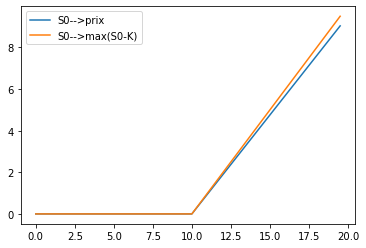

In [4]:
graphe_call()

In [14]:
# cas générale

import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from random import random

def payoff_call(s,K):
  
    return max(s-K,0)

def  Prix_call_Stfixe_tfixe(t,St,sigma,r,T,Nmc,K):
    gain = np.zeros((Nmc))
    for n in range(Nmc):
        g= np.random.randn() 
        ST= St*np.exp((r-sigma**2/2)*(T-t)+ sigma*np.sqrt(T-t)*g)
        gain[n]=payoff_call(ST,K)
        
    prix=np.exp(-r*(T-t))*np.mean(gain)
    
    return prix

def Surface_call():
    
    Nmc=1000
    L=20
    K=10
    T=0.5
    r=0.1
    sigma=0.5
    Nt=10
    Ns=40

    
    St=np.linspace(0,L,Ns)
    t=np.linspace(0,T,Nt)
    prix_surface = np.zeros((Nt,Ns))
    
    for j in range(Ns):
        for m in range(Nt):
            
            prix_surface[m][j]=Prix_call_Stfixe_tfixe(t[m],St[j],sigma,r,T,Nmc,K)
    
    #plt.plot(St,prix_surface[0])
    
    St,t=np.meshgrid(St,t)
    #print( prix_surface)
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_surface(St,t,prix_surface,cmap=cm.coolwarm)
    
    plt.show()
    St=np.linspace(0,L,Ns)
    plt.plot(St,prix_surface[0])
    
    plt.show()

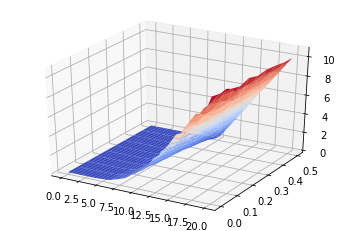

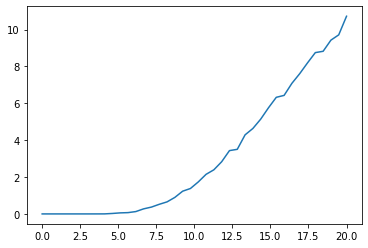

In [15]:
Surface_call()